# 0-1 Loss

`BVDExperiment` supports experiments using the 0-1 loss and the ``effect`` decomposition, measuring the effects of the average bias, average variance and the diversity on the expected risk.

### Basic Example for 0-1 Loss
Changing from the cross-entropy to the 0-1 loss is just a matter of changing the loss function defined when initialising the experiment object

In [1]:
# Necessary imports
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from decompose.experiments import BVDExperiment
from decompose import plotting_utils

from decompose.data_utils import load_standard_dataset
n_trials = 100

import numpy as np


100%|██████████| 17/17 [00:37<00:00,  2.22s/it]


<AxesSubplot:xlabel='max depth'>

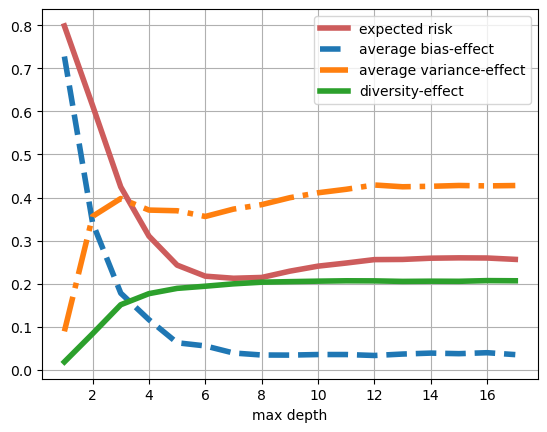

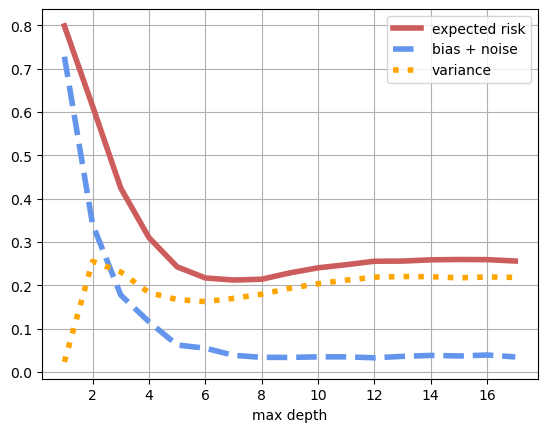

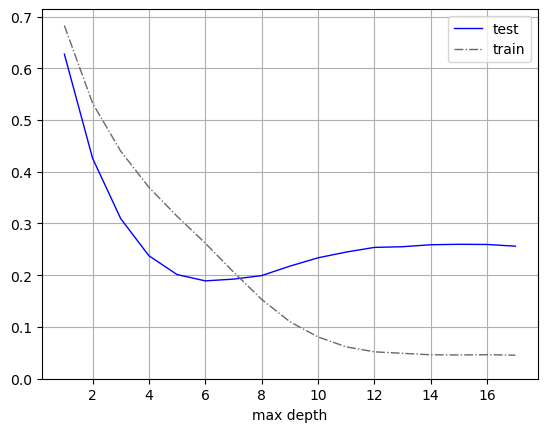

In [2]:
# Load the training data
train_data, train_labels, test_data, test_labels = load_standard_dataset("digits", frac_training=0.5, label_noise=0.3)

# Describe the ensemble we want to investigate
rf_classifier = RandomForestClassifier(n_estimators=5)

# Define experiment varying max depth and looking at the 0-1 loss
experiment = BVDExperiment(rf_classifier,
                           loss="zero_one",
                           parameter_name="max_depth",
                           parameter_values=range(1,18,1))

# store results
results = experiment.run_experiment(train_data, train_labels, test_data, test_labels, n_trials=n_trials)

# plot bias-variance-diversity components
plotting_utils.plot_bvd(results, x_label="max depth", integer_x=True)
# plot bias-variance components
plotting_utils.plot_bv(results, x_label="max depth", integer_x=True)
# plot train and test errors
plotting_utils.plot_errors(results, x_label="max depth", integer_x=True)

### Cross-Entropy and 0-1 Loss in the Same Experiment

It is also possible to compute both the decomposition for cross-entropy and 0-1 loss in a single experiment. This is done by setting an argument when we initialise the `BVDExperiment` object.

100%|██████████| 17/17 [00:53<00:00,  3.16s/it]


<AxesSubplot:title={'center':'Zero-One Decomposition'}, xlabel='max depth'>

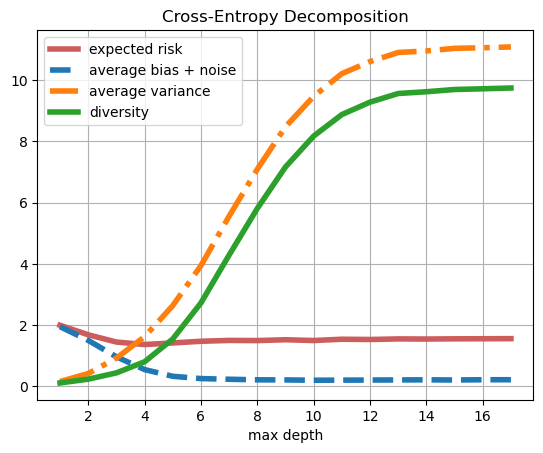

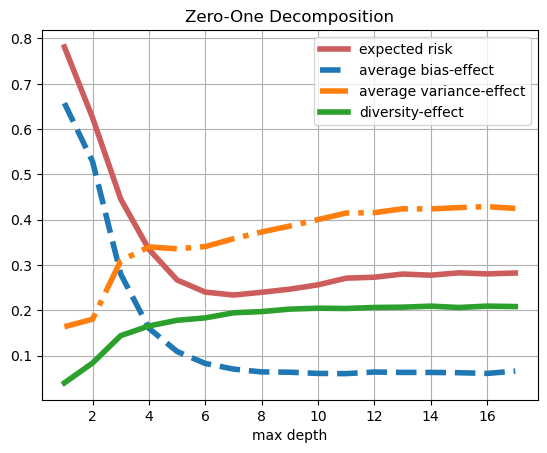

In [3]:
n_trials = 100
# Load the training data
train_data, train_labels, test_data, test_labels = load_standard_dataset("digits", frac_training=0.5, label_noise=0.3)

# Describe the ensemble we want to investigate
rf_classifier = RandomForestClassifier(n_estimators=5)

# Define experiment varying max depth and looking at the 0-1 loss
experiment = BVDExperiment(rf_classifier,
                           loss="cross_entropy",
                           parameter_name="max_depth",
                           parameter_values=range(1,18,1),
                           compute_zero_one_decomp=True)

# The results object for the primary loss function is returned when we run run_experiment
cross_entropy_results = experiment.run_experiment(train_data, train_labels, test_data, test_labels, n_trials=n_trials)

# A second set or results for the 0-1 loss is stored in experiment.zero_one_results
zero_one_results = experiment.zero_one_results

# plot bias-variance-diversity components
plotting_utils.plot_bvd(cross_entropy_results, x_label="max depth", integer_x=True, title="Cross-Entropy Decomposition")
plotting_utils.plot_bvd(zero_one_results, x_label="max depth", integer_x=True, title="Zero-One Decomposition")